In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
dong_names = ['염창동', '등촌1동', '등촌2동', '등촌3동', '화곡본동', 
     '화곡1동', '화곡2동', '화곡3동', '화곡4동', '화곡6동', '화곡8동',
     '가양1동', '가양2동', '가양3동', '발산1동', '공항동',
     '방화1동', '방화2동', '방화3동', '우장산동']

In [4]:
X1 = pd.read_csv('X_경로당정보.csv', index_col=0)
X2 = pd.read_excel('X_노인교실현황.xlsx', index_col=0)
X3 = pd.read_csv('X_노인주민등록인구.csv', index_col=0)
X4 = pd.read_csv('X_대형점포수.csv', index_col=0)
X5 = pd.read_csv('X_무더위쉼터수.csv', index_col=0)
X6 = pd.read_csv('X_버스_지하철_승객수.csv', index_col=0)
X7 = pd.read_csv('X_실내문화시설수.csv', index_col=0)
X8 = pd.read_csv('X_의료시설수.csv', index_col=0)
X9 = pd.read_csv('X_전통시장수.csv', index_col=0)
X10 = pd.read_csv('X_한파쉼터수.csv', index_col=0)
X11 = pd.read_csv('X_공원수.csv', index_col=0)
X12 = pd.read_csv('X_공공기관접근성.csv', index_col=0)
X13 = pd.read_csv('X_일자리지원기관.csv', index_col=0)

Y = pd.read_csv('Y_생활인구.csv', index_col=0)

In [5]:
%config InlineBackend.figure_format = 'retina'

## 기본 전처리

In [6]:
X1.index = map(lambda x: x.strip(), X1.index)
X2.index = map(lambda x: x.strip(), X2.index)
X3.index = map(lambda x: x.strip(), X3.index)
X4.index = map(lambda x: x.strip(), X4.index)
X5.index = map(lambda x: x.strip(), X5.index)
X6.index = map(lambda x: x.strip(), X6.index)
X7.index = map(lambda x: x.strip(), X7.index)
X8.index = map(lambda x: x.strip(), X8.index)
X9.index = map(lambda x: x.strip(), X9.index)
X10.index = map(lambda x: x.strip(), X10.index)
X11.index = map(lambda x: x.strip(), X11.index)
X12.index = map(lambda x: x.strip(), X12.index)
X13.index = map(lambda x: x.strip(), X13.index)

In [7]:
X1 = X1.reindex(dong_names)
X2 = X2.reindex(dong_names)
X3 = X3.reindex(dong_names)
X4 = X4.reindex(dong_names)
X5 = X5.reindex(dong_names)
X6 = X6.reindex(dong_names)
X7 = X7.reindex(dong_names)
X8 = X8.reindex(dong_names)
X9 = X9.reindex(dong_names)
X10 = X10.reindex(dong_names)
X11 = X11.reindex(dong_names)
X12 = X12.reindex(dong_names)
X13 = X13.reindex(dong_names)

In [8]:
X_lists = [X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13]

In [9]:
test_X = [X1['2020\n회원수'], X1['연면적'], X1['경로당 수'],
          X2['노인교실 수'], X2['노인교실 프로그램 수'], X2['노인교실 현원'],
          X3['노인 주민등록인구 수'], X3['노인 인구 비율'], X4['대형점포수'],
          X5['무더위쉼터 수'], X6['버스 승객 수'], X6['지하철 승객 수'],
          X7['문화시설수'], X8['병원 수'], X8['보건소 수'], X9['0'], 
          X10['한파쉼터 수'], X11['공원수'], X12['주민센터 및 구청 수/면적'], X13['일자리지원기관수']      
         ]

In [10]:
for i, element in enumerate(test_X[6]):
    test_X[6][i] = int(element.replace(',','')) #콤마제거 후 정수로 받음


C:\Users\thsth\AppData\Local\Temp\ipykernel_11856\3048053645.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_X[6][i] = int(element.replace(',','')) #콤마제거 후 정수로 받음


In [11]:
test_X[6] = test_X[6].astype(int)

## Scatter

In [16]:
# 한글 사용을 위한 기본 설정
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='whitegrid')

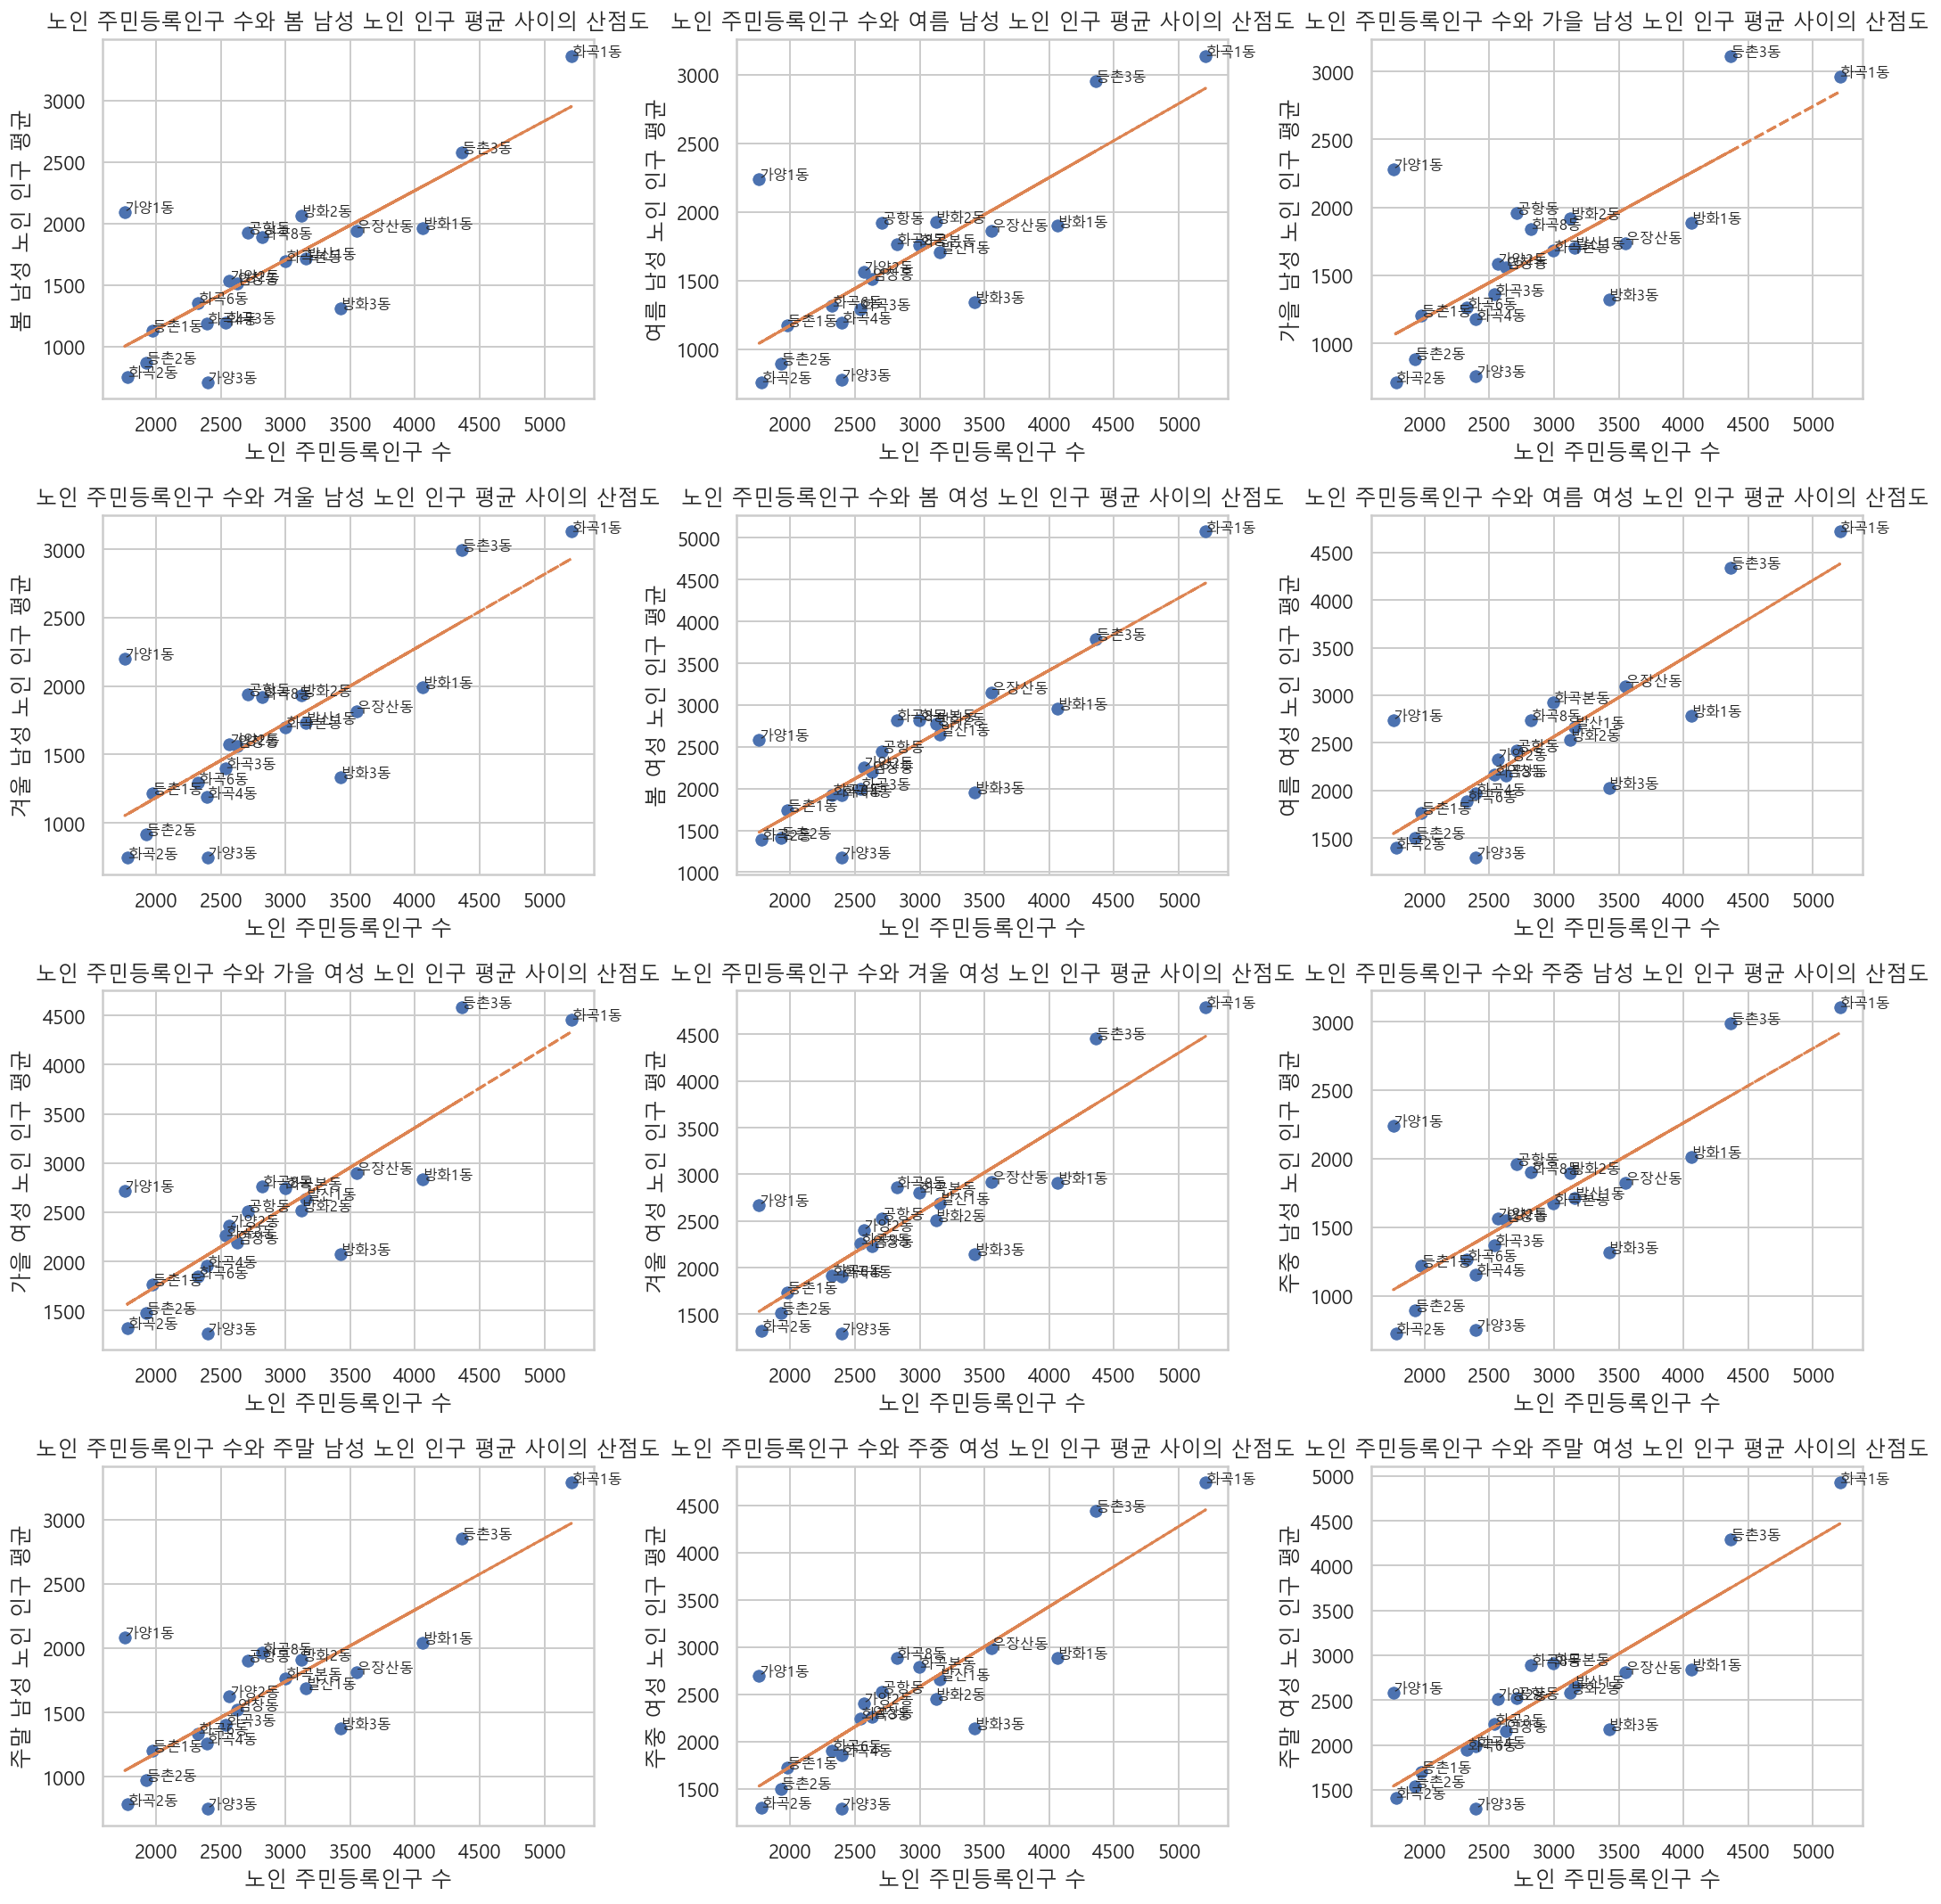

In [120]:
f, axes = plt.subplots(4, 3, sharex=False, sharey=False)
f.set_size_inches((15, 15)) 
c = 0

for i in range(0, 4):
    for j in range(0, 3):
        x = test_X[6]
        y = Y[Y.columns[c]]
        
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        
        axes[i, j].scatter(x, y)
        
        axes[i, j].plot(x, y, 'o')
        axes[i, j].plot(x, p(x), "--")
        
        axes[i, j].set_title(f'{x.name}와 {Y.columns[c]} 사이의 산점도')
        axes[i, j].set_xlabel(f'{x.name}')
        axes[i, j].set_ylabel(f'{Y.columns[c]}')
        
        for k, txt in enumerate(Y.index):
            axes[i, j].annotate(txt, (x[k], y[k]), fontsize = 8)
        
        c += 1

fig1 = plt.gcf()        

f.tight_layout()
plt.show()

fig1.savefig('registered_elderly.png')

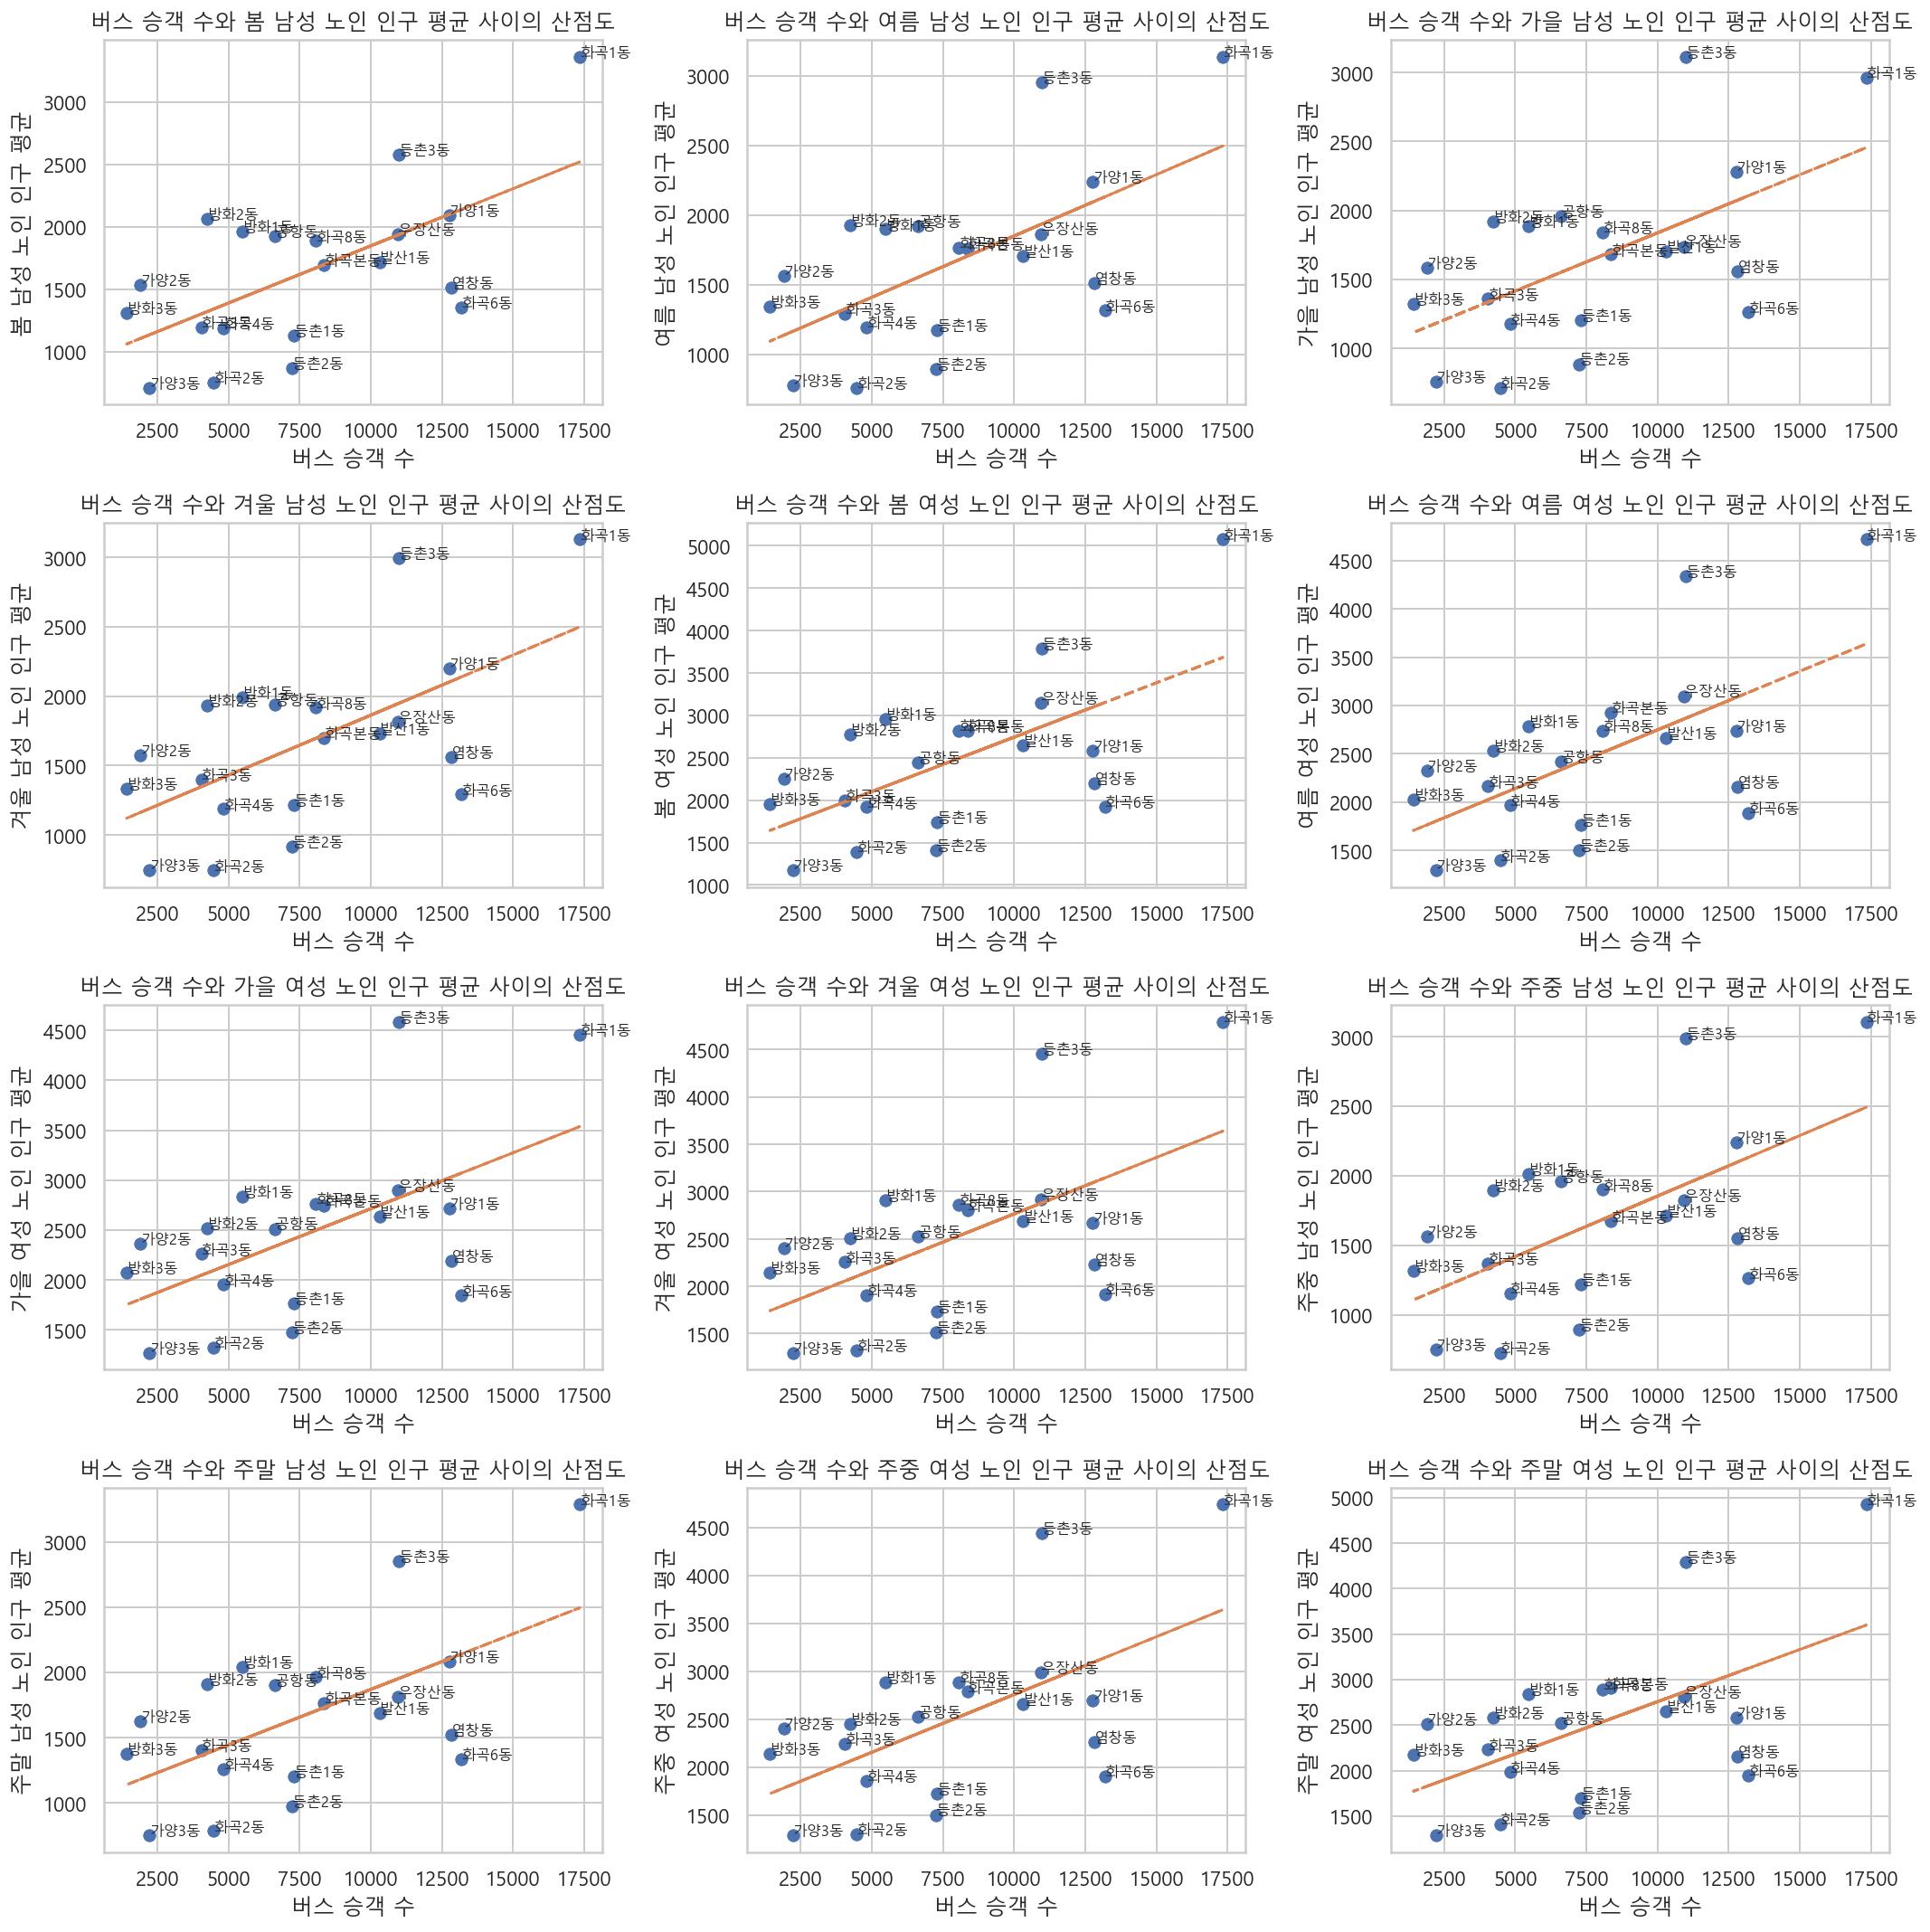

In [119]:
f, axes = plt.subplots(4, 3, sharex=False, sharey=False)
f.set_size_inches((15, 15)) 
c = 0

for i in range(0, 4):
    for j in range(0, 3):
        x = test_X[10]
        y = Y[Y.columns[c]]
        
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        
        axes[i, j].scatter(x, y)
        
        axes[i, j].plot(x, y, 'o')
        axes[i, j].plot(x, p(x), "--")
        
        axes[i, j].set_title(f'{x.name}와 {Y.columns[c]} 사이의 산점도')
        axes[i, j].set_xlabel(f'{x.name}')
        axes[i, j].set_ylabel(f'{Y.columns[c]}')
        
        for k, txt in enumerate(Y.index):
            axes[i, j].annotate(txt, (x[k], y[k]), fontsize = 8)
        
        c += 1

fig1 = plt.gcf()        

f.tight_layout()
plt.show()

fig1.savefig('bus_passenger.png')

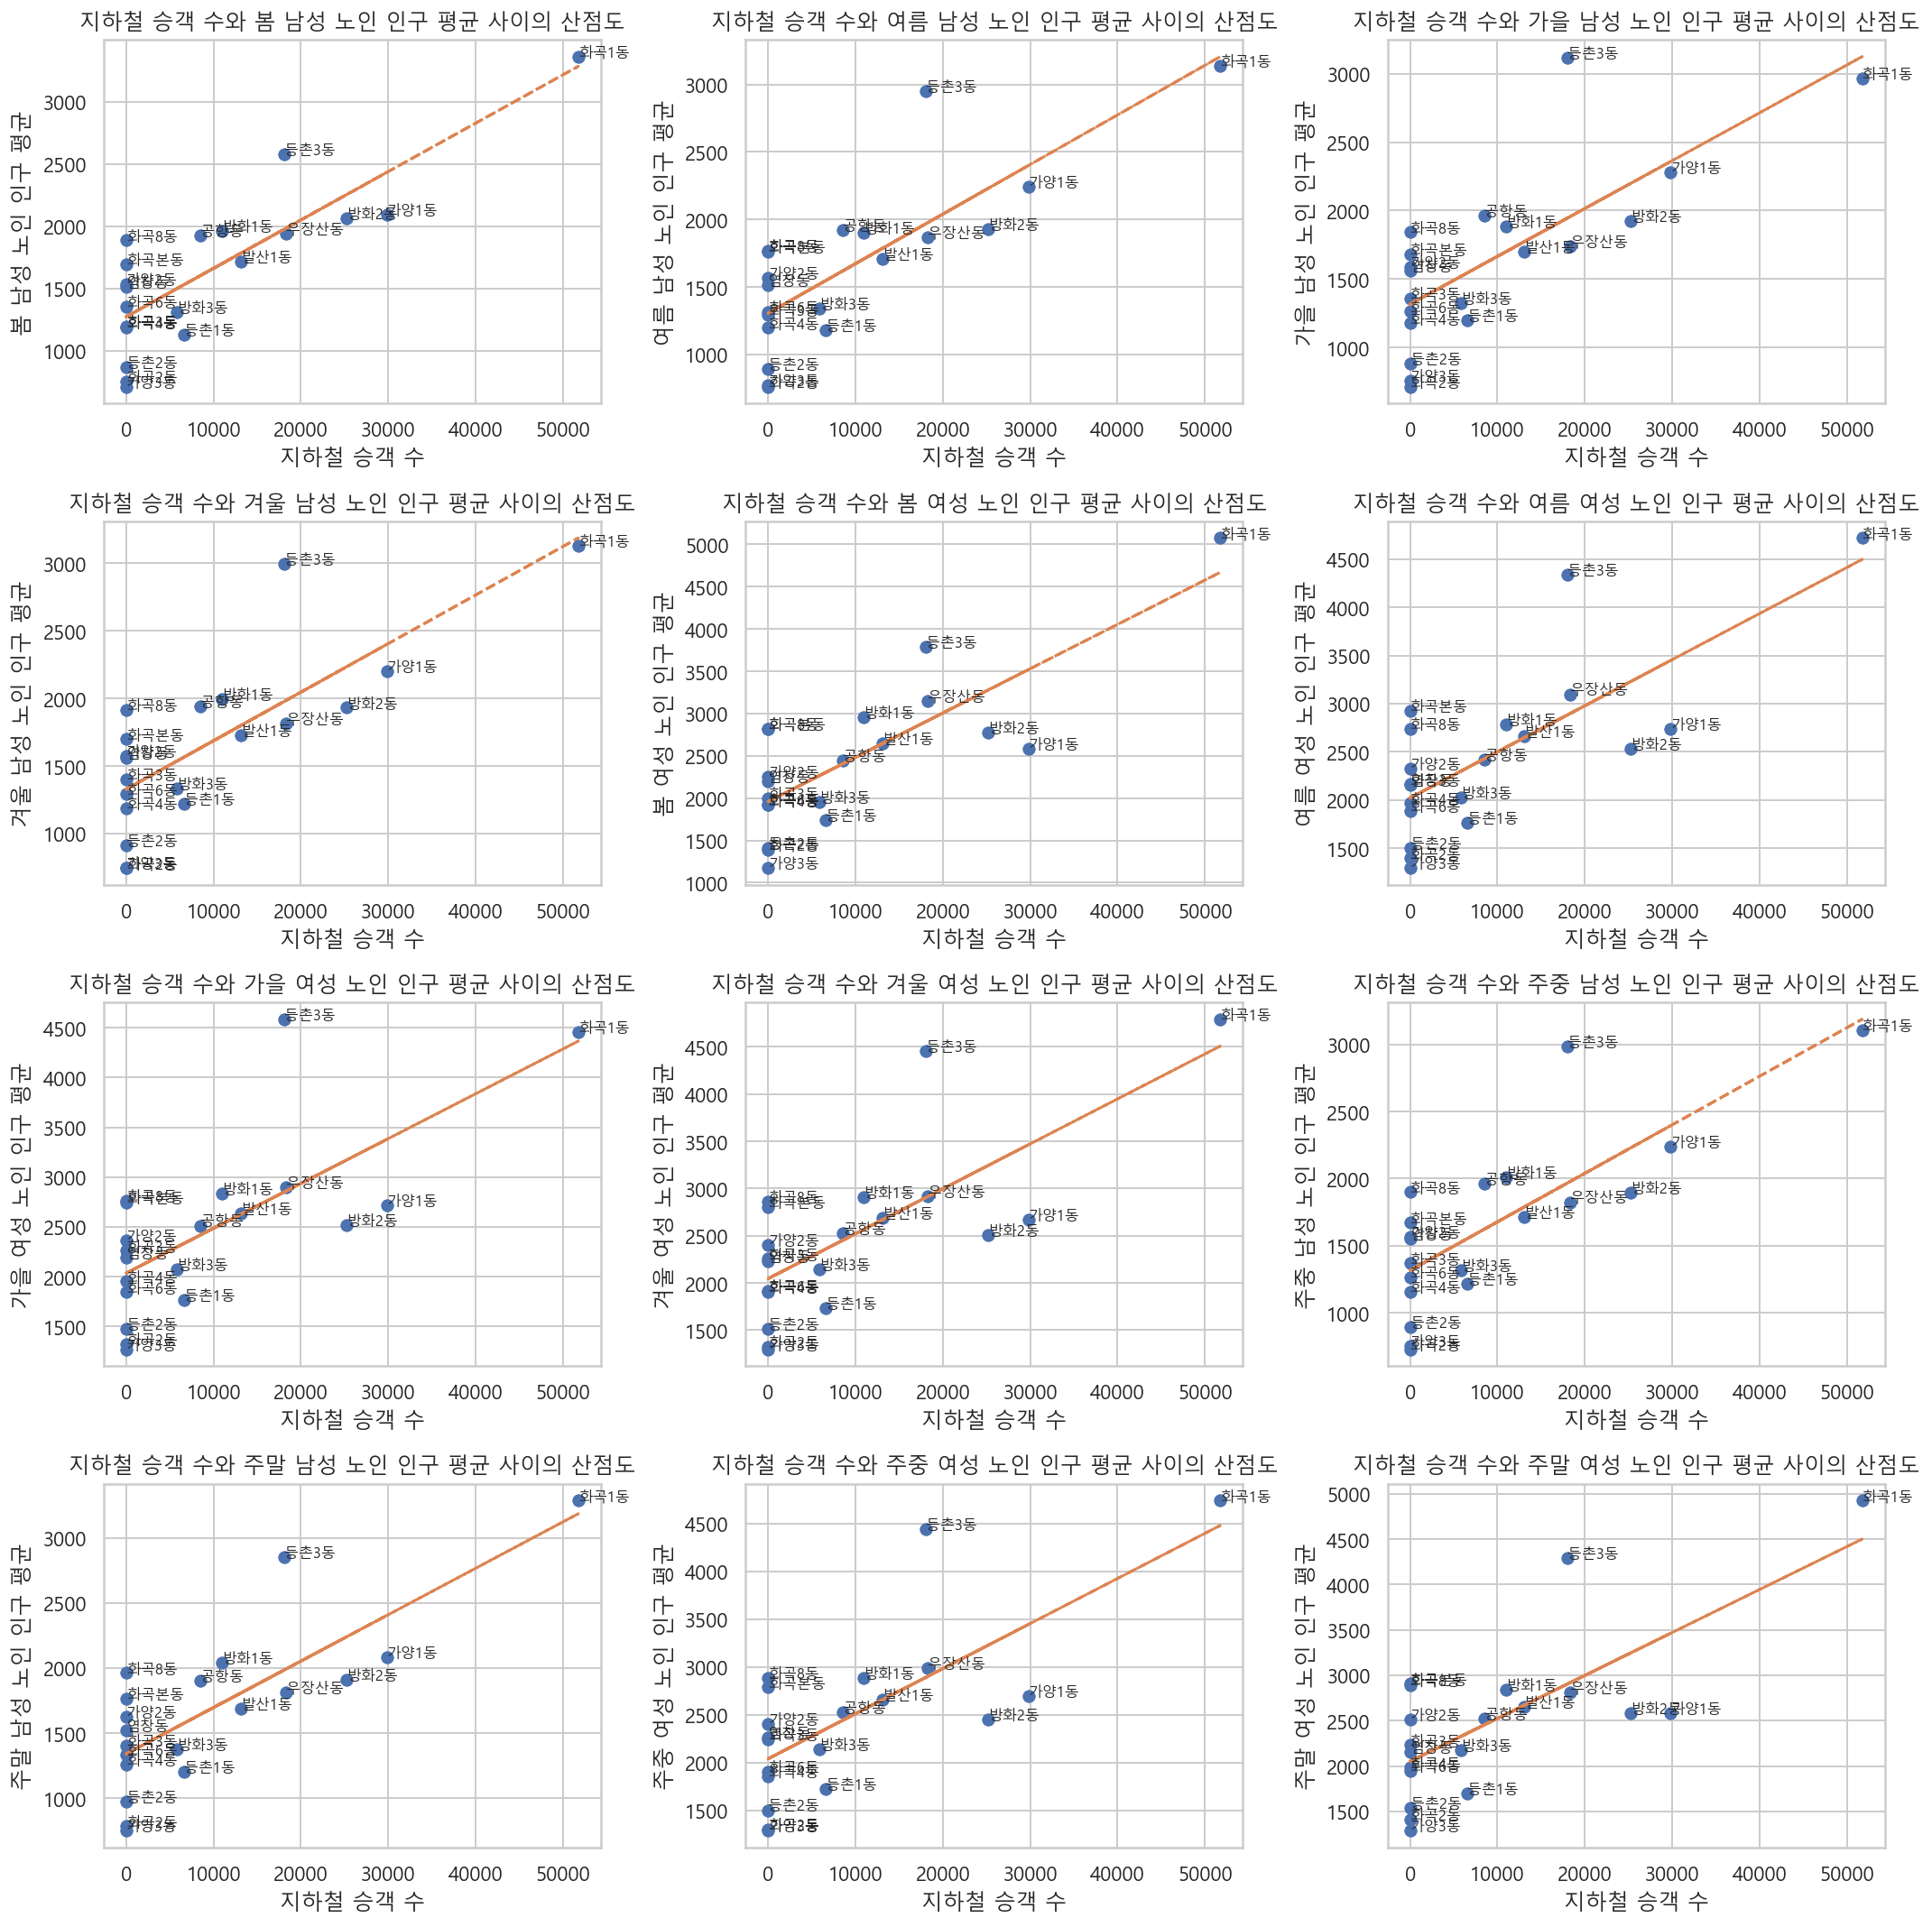

In [117]:
f, axes = plt.subplots(4, 3, sharex=False, sharey=False)
f.set_size_inches((15, 15)) 
c = 0

for i in range(0, 4):
    for j in range(0, 3):
        x = test_X[11]
        y = Y[Y.columns[c]]
        
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        
        axes[i, j].scatter(x, y)
        
        axes[i, j].plot(x, y, 'o')
        axes[i, j].plot(x, p(x), "--")
        
        axes[i, j].set_title(f'{x.name}와 {Y.columns[c]} 사이의 산점도')
        axes[i, j].set_xlabel(f'{x.name}')
        axes[i, j].set_ylabel(f'{Y.columns[c]}')
        
        for k, txt in enumerate(Y.index):
            axes[i, j].annotate(txt, (x[k], y[k]), fontsize = 8)
        
        c += 1

fig1 = plt.gcf()        

f.tight_layout()
plt.show()

fig1.savefig('subway_passenger.png')

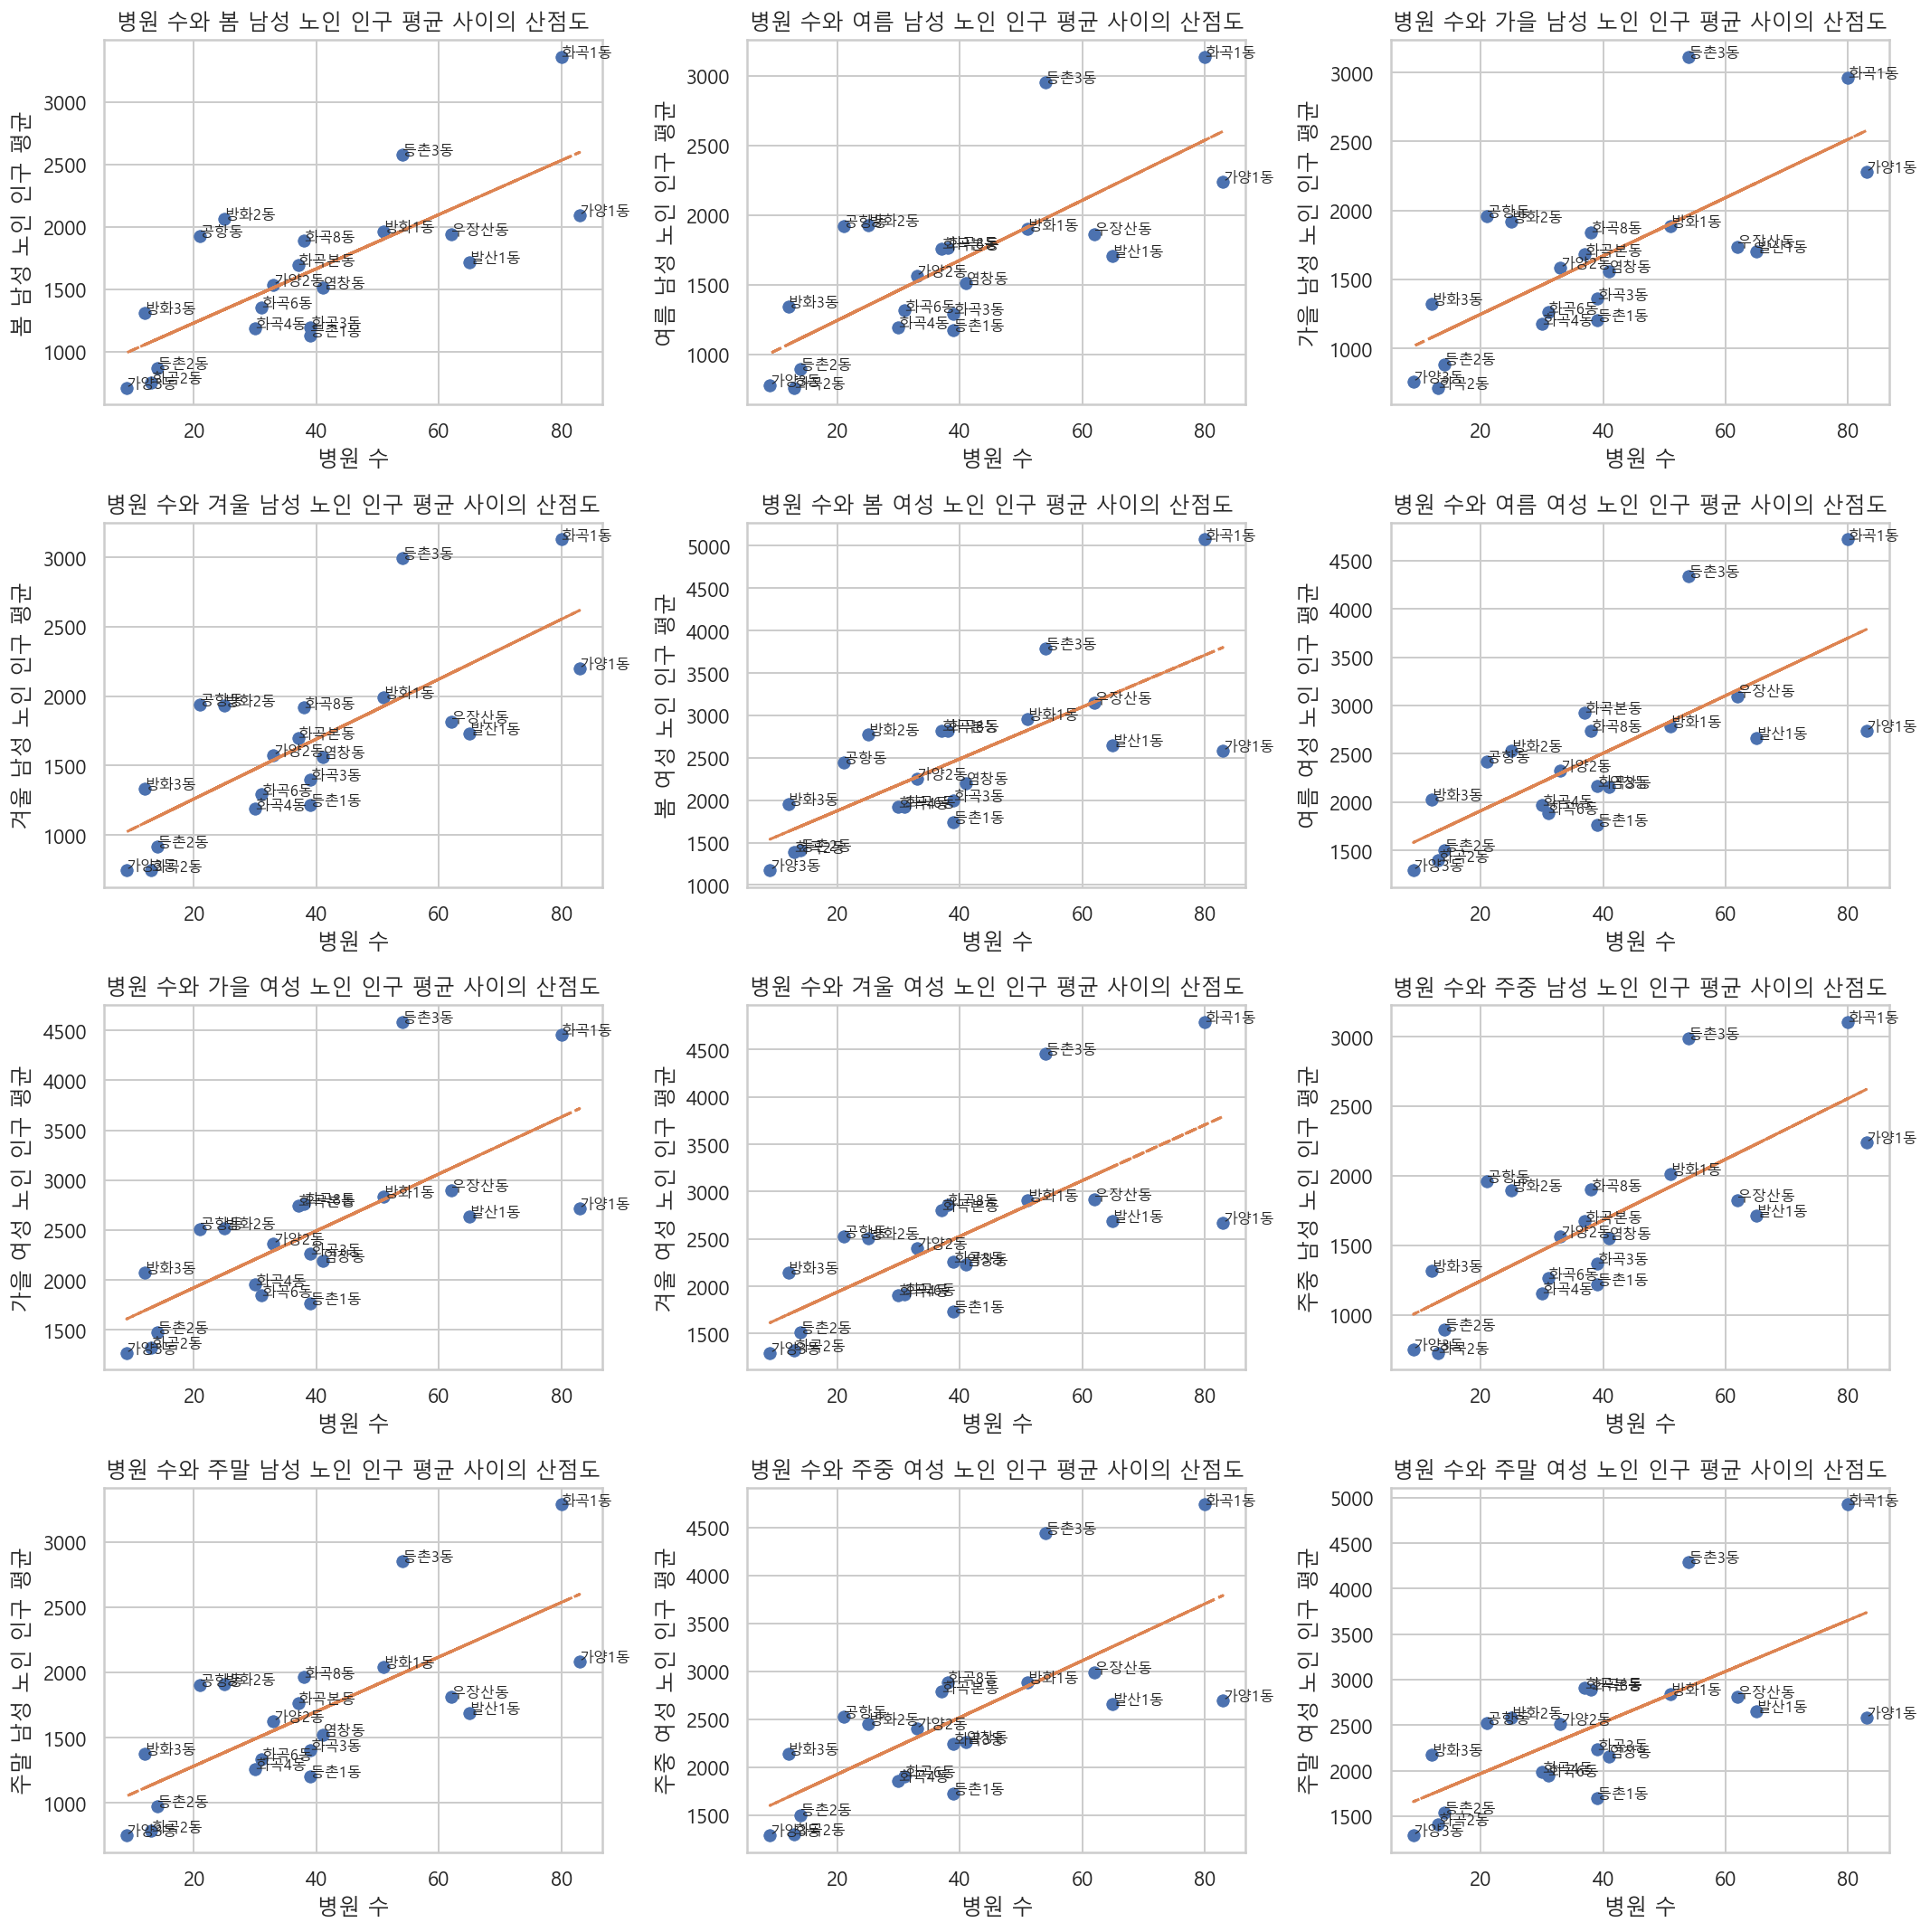

In [118]:
f, axes = plt.subplots(4, 3, sharex=False, sharey=False)
f.set_size_inches((15, 15)) 
c = 0

for i in range(0, 4):
    for j in range(0, 3):
        x = test_X[13]
        y = Y[Y.columns[c]]
        
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        
        axes[i, j].scatter(x, y)
        
        axes[i, j].plot(x, y, 'o')
        axes[i, j].plot(x, p(x), "--")
        
        axes[i, j].set_title(f'{x.name}와 {Y.columns[c]} 사이의 산점도')
        axes[i, j].set_xlabel(f'{x.name}')
        axes[i, j].set_ylabel(f'{Y.columns[c]}')
        
        for k, txt in enumerate(Y.index):
            axes[i, j].annotate(txt, (x[k], y[k]), fontsize = 8)
        
        c += 1

fig1 = plt.gcf()        

f.tight_layout()
plt.show()

fig1.savefig('hospital.png')

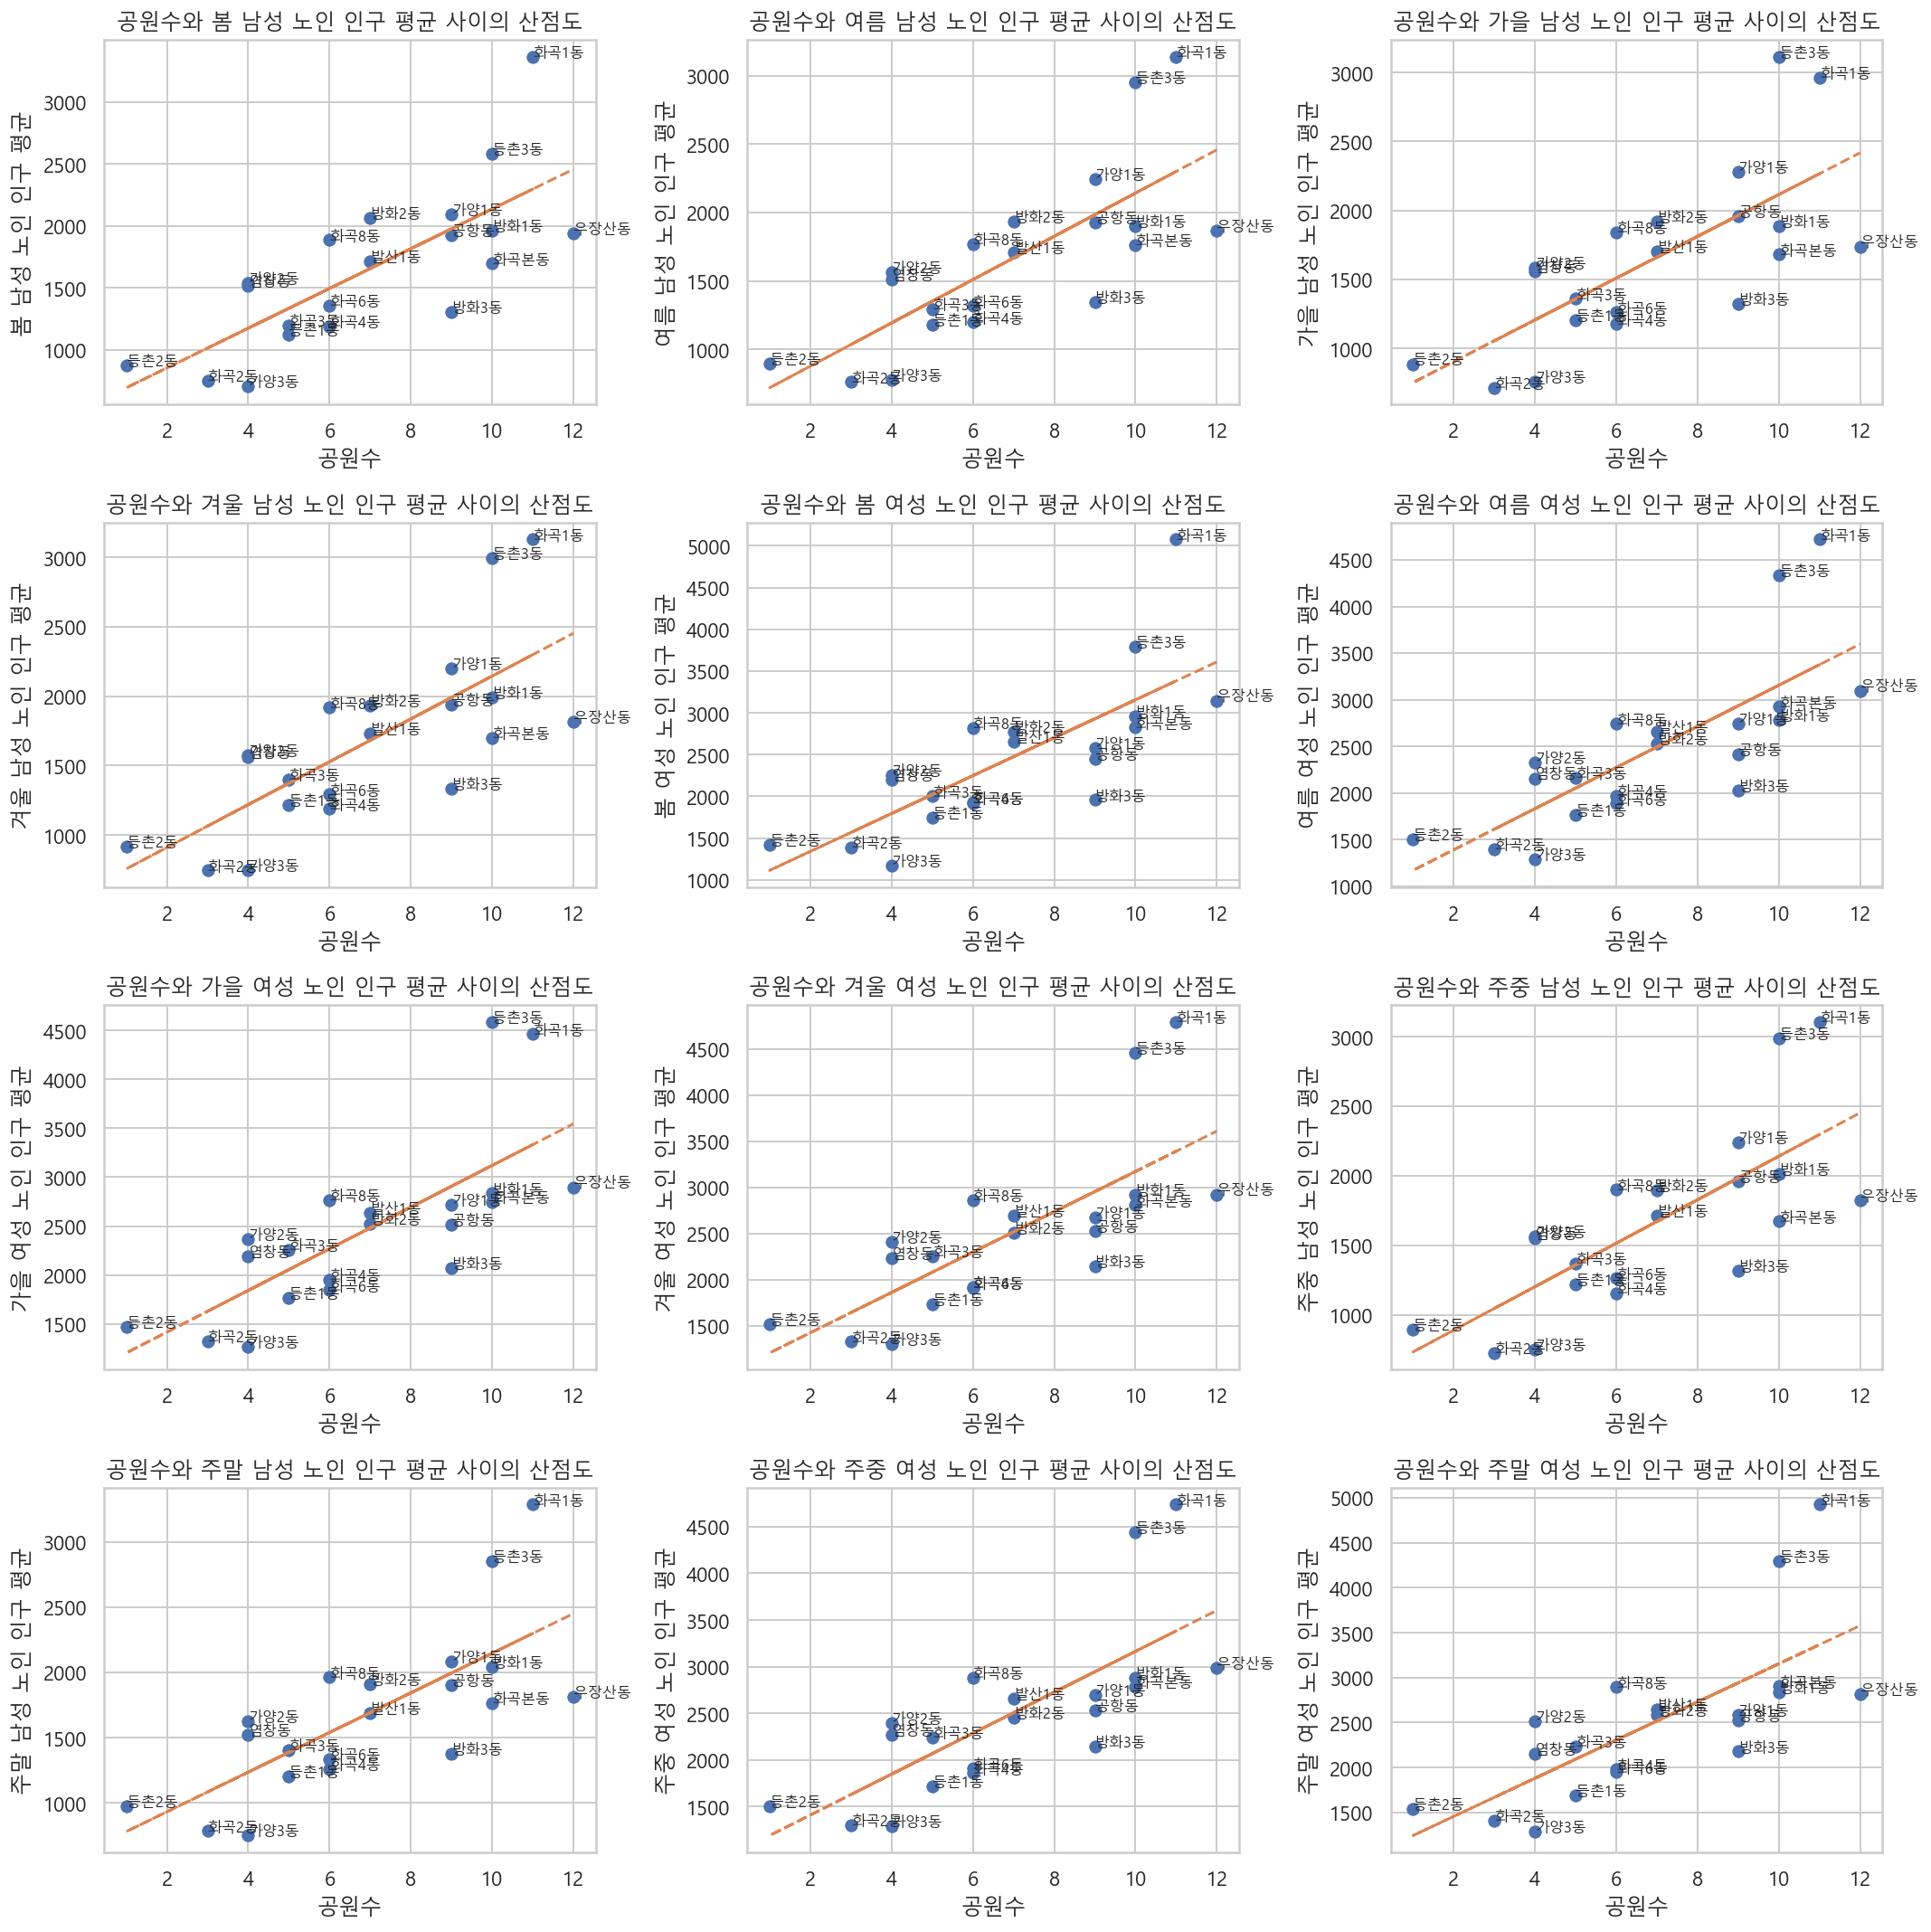

In [130]:
f, axes = plt.subplots(4, 3, sharex=False, sharey=False)
f.set_size_inches((15, 15)) 
c = 0

for i in range(0, 4):
    for j in range(0, 3):
        x = test_X[-1]
        y = Y[Y.columns[c]]
        
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        
        axes[i, j].scatter(x, y)
        
        axes[i, j].plot(x, y, 'o')
        axes[i, j].plot(x, p(x), "--")
        
        axes[i, j].set_title(f'{x.name}와 {Y.columns[c]} 사이의 산점도')
        axes[i, j].set_xlabel(f'{x.name}')
        axes[i, j].set_ylabel(f'{Y.columns[c]}')
        
        for k, txt in enumerate(Y.index):
            axes[i, j].annotate(txt, (x[k], y[k]), fontsize = 8)
        
        c += 1

fig1 = plt.gcf()        

f.tight_layout()
plt.show()

fig1.savefig('park.png')

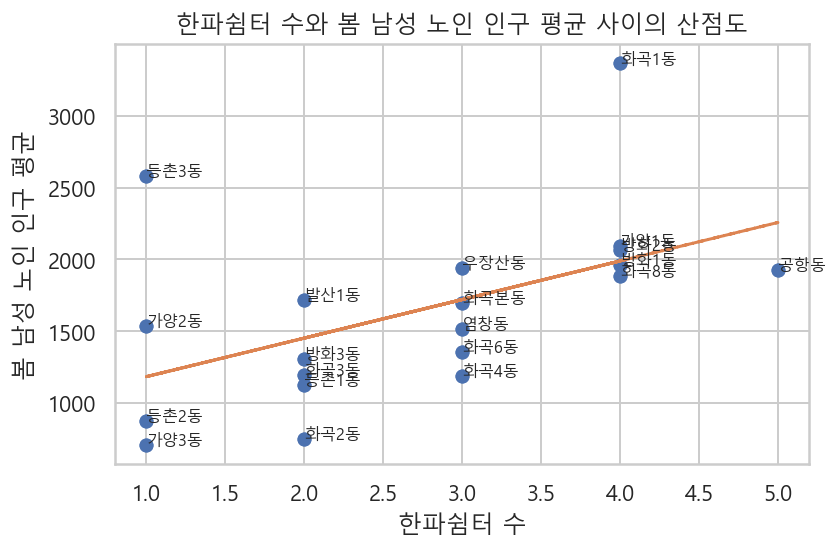

In [121]:
f, axes = plt.subplots(1, 1, sharex=False, sharey=False)
f.set_size_inches((6, 4)) 
c = 0

x = test_X[-2]
y = Y[Y.columns[0]]
        
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
        
axes.scatter(x, y)
        
axes.plot(x, y, 'o')
axes.plot(x, p(x), "--")
        
axes.set_title(f'{x.name}와 {Y.columns[0]} 사이의 산점도')
axes.set_xlabel(f'{x.name}')
axes.set_ylabel(f'{Y.columns[0]}')
        
for k, txt in enumerate(Y.index):
    axes.annotate(txt, (x[k], y[k]), fontsize = 8)


fig1 = plt.gcf()        

f.tight_layout()
plt.show()

fig1.savefig('coldwave_shelter.png')

## ClusterMap

In [12]:
ans = dict()
for i, x in enumerate(test_X):
    test_X[i] = test_X[i].fillna(0)
    x = x.fillna(0)
    ans[x.name] = list()
    for y in Y.columns:
        ans[x.name].append(np.corrcoef(x, Y[y])[0, 1])

In [13]:
df = pd.DataFrame(ans, index = Y.columns)

In [14]:
df.rename(columns = {'2020\n회원수':'경로당회원수', '0':'전통시장수'},inplace=True)

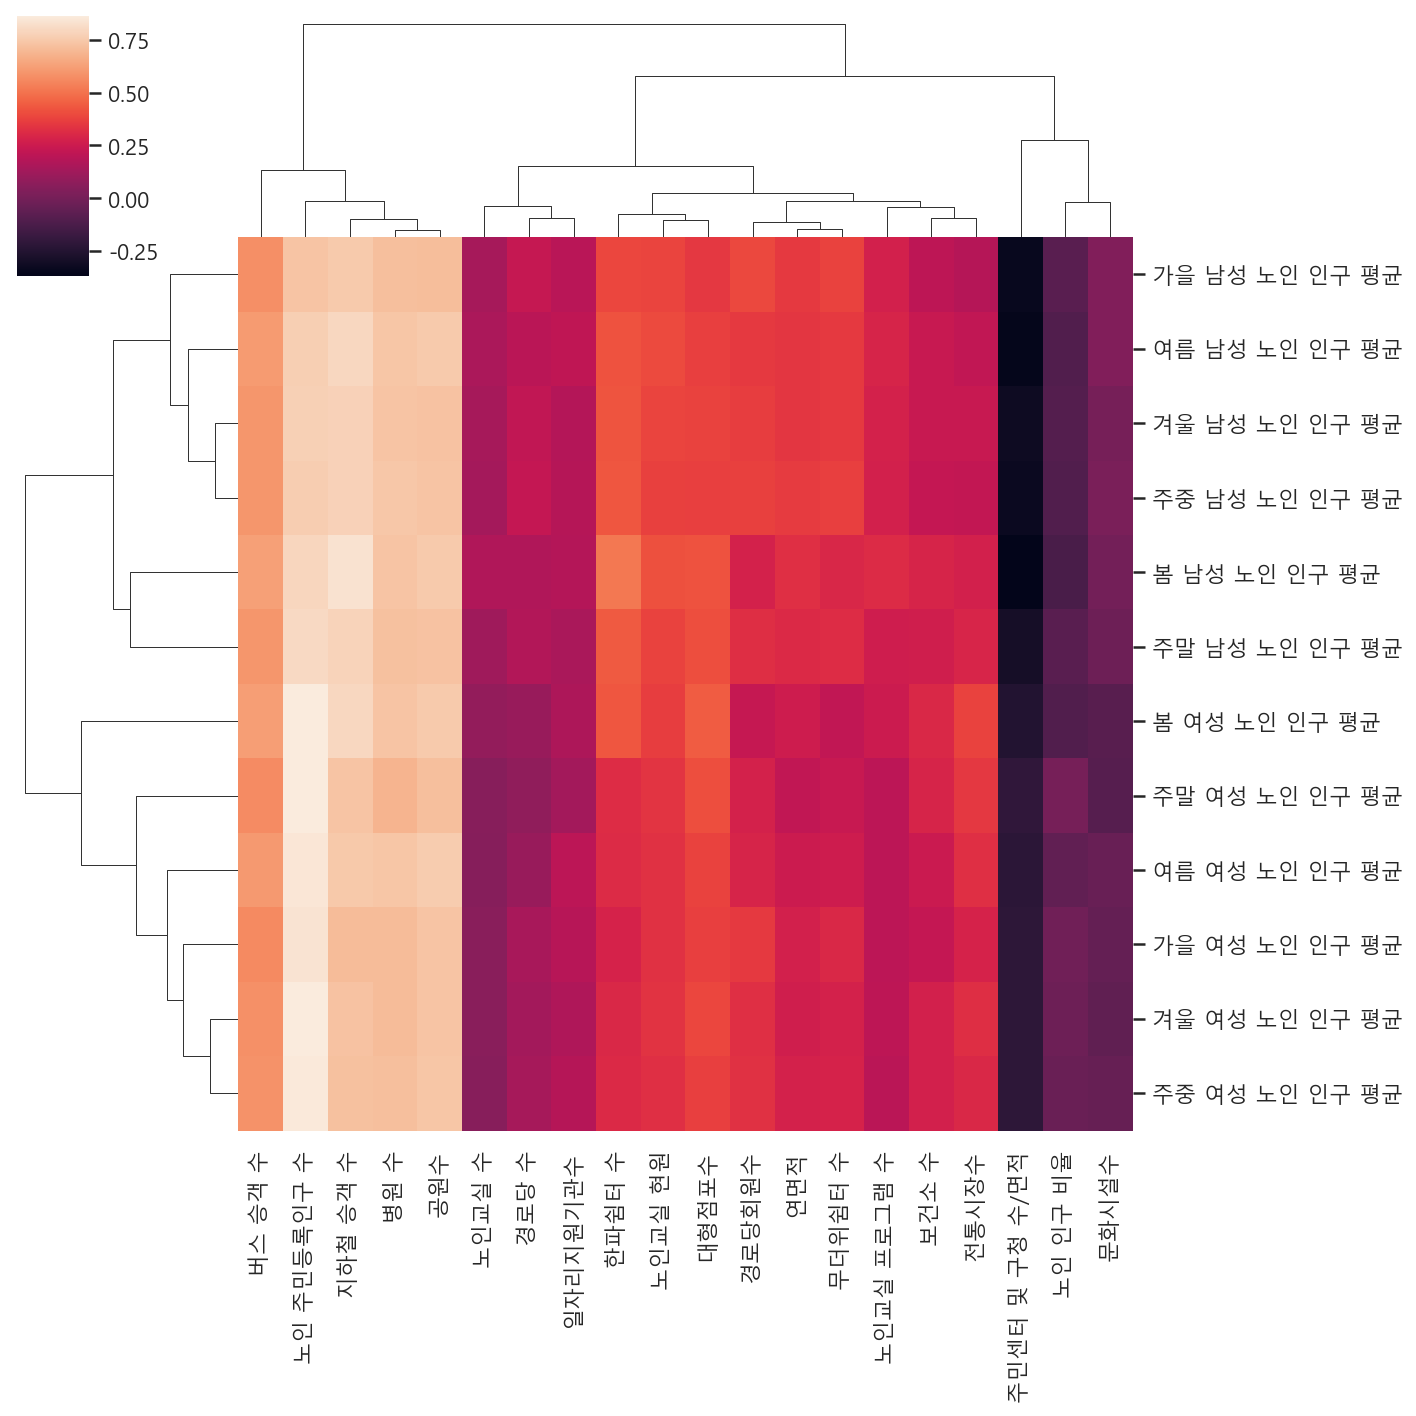

In [17]:
sns.clustermap(df)

fig1 = plt.gcf()        

fig1.savefig('clustermap.png')

In [86]:
ans

{'2020\n회원수': [0.279662912062964,
  0.3544929579926806,
  0.39542547349539736,
  0.3652828242298406,
  0.22900770293630915,
  0.28864723172176604,
  0.35498742507530706,
  0.3250090121725369,
  0.37365673343535283,
  0.3224214723411227,
  0.32966729838327397,
  0.279264990966475],
 '연면적': [0.3268163550334619,
  0.34508081572419486,
  0.35477917950053894,
  0.3457820936582561,
  0.25446805828097396,
  0.24910065217022248,
  0.27537253392281025,
  0.2655966759388715,
  0.3585242388251588,
  0.30687656806293584,
  0.27640479549515573,
  0.2139364643767681],
 '경로당 수': [0.1687426042111933,
  0.19823661385811495,
  0.231986267041821,
  0.2166356069621235,
  0.09954559676393503,
  0.10129169779799464,
  0.14514935786367933,
  0.1311508753894419,
  0.2274266524412118,
  0.17531147239659453,
  0.14034917954794754,
  0.07915584536654219],
 '노인교실 수': [0.16947453607374605,
  0.1562048004574583,
  0.14170160277939783,
  0.13773280733805102,
  0.08558387009100227,
  0.04955521486790272,
  0.05628136